In [11]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Import the anndata objects
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
anndata_objects = []
anndataA11 = sc.read(OUTPUT_DIR + '/' + 'A1-1/anndataNucA11_it_score_genes.h5ad')
anndataA12 = sc.read(OUTPUT_DIR + '/' + 'A1-2/anndataNucA12_it_score_genes.h5ad')
anndataC2 = sc.read(OUTPUT_DIR + '/' + 'C2/anndataNucC2_it_score_genes.h5ad') 
anndataD21 = sc.read(OUTPUT_DIR + '/' + 'D2-1/anndataNucD21_it_score_genes.h5ad')
anndata_objects.append(anndataA11)
anndata_objects.append(anndataA12)
anndata_objects.append(anndataC2)
anndata_objects.append(anndataD21)

In [9]:
anndataC2.obs.columns

Index(['region', 'instance', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_2_genes',
       'pct_counts_in_top_5_genes', 'n_counts', 'shapeSize', 'leiden',
       'annotation_score_genes_25', 'cleanliness_score_genes_25',
       'score_celltype_own_score_genes',
       'second_score_celltype_own_score_genes', 'cleanliness_own_score_genes',
       'annotation_own_score_genes_start_iterative',
       'annotation_own_score_genes', 'count_density', 'leiden_cell_types',
       'score_celltype_own_score_genes_strat_1_2',
       'second_score_celltype_own_score_genes_strat_1_2',
       'cleanliness_own_score_genes_strat_1_2',
       'annotation_own_score_genes_start_iterative_strat_1_2',
       'annotation_own_score_genes_strat_1_2', 'equal_1_2'],
      dtype='object')

In [3]:
annotations = ['annotation_score_genes_25','annotation_own_score_genes_start_iterative','annotation_own_score_genes']
names_anno_plot = ['original','score_genes','iterative_score_genes']
samples = ["A11","A12","C2","D21"]

In [ ]:

cell_types = []
# get unique values in the annotation column
for anno in annotations:
    cell_types.extend(anndataD21.obs[anno].unique().to_list())
    print(anndataA11.obs[anno].unique().to_list())
cell_types = np.unique(cell_types).tolist()
# remove 'Hepa'
cell_types.remove('Hepa')

In [66]:
all_fractions_per_cell_type = []
for ct in cell_types:
    fraction_in_each_annotation = []
    for annotation in annotations:
        nr_cells = len(anndataA11.obs[annotation])
        ct_counts = anndataA11.obs[annotation].value_counts()
        if ct in ct_counts.index:
            count = ct_counts[ct]
        else:
            count = 0
        fraction_in_each_annotation.append((count/nr_cells)*100)
    all_fractions_per_cell_type.append(fraction_in_each_annotation)
print(cell_types)
all_fractions_per_cell_type 

['B cell', 'Central vein', 'Chol', 'Fibr', 'Kupf', 'LSEC', 'Meso', 'Oth im', 'Portal LAM', 'Portal vein', 'Stel', 'Unknown']


[[1.8079800498753118, 1.5318845742785894, 1.7278232988956181],
 [0.9707873174207339, 0.4987531172069825, 1.059850374064838],
 [2.3779836123975775, 2.253295333095832, 2.680798004987531],
 [2.0484503028143926, 2.3334520840755255, 2.8589241182757394],
 [5.049875311720698, 4.934093338083363, 6.572853580334876],
 [6.706448165301033, 12.468827930174564, 11.863199144994656],
 [0.062344139650872814, 0.38297114356964734, 0.40969006056287854],
 [1.5853224082650517, 1.77235482721767, 1.5407908799429997],
 [0.6145350908443178, 1.1845386533665836, 1.5675097969362308],
 [4.613466334164588, 1.6921980762379762, 1.8970431065194158],
 [3.7406483790523692, 6.243320270751692, 6.047381546134663],
 [0.0, 0.5432846455290345, 0.5432846455290345]]

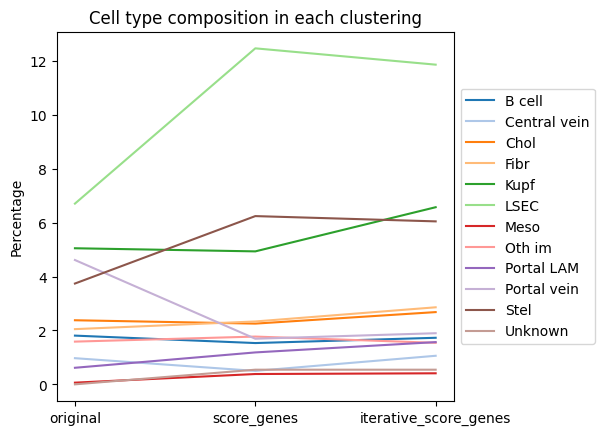

In [67]:
colors = []
for c in plt.cm.tab20.colors: colors.append(matplotlib.colors.to_hex(c))
for c in plt.cm.tab20b.colors: colors.append(matplotlib.colors.to_hex(c))

fig, ax = plt.subplots()
c = 0
for i in range(len(all_fractions_per_cell_type)):    
    ax.plot(names_anno_plot, all_fractions_per_cell_type[i], label=cell_types[i], c=colors[c])
    c += 1
plt.ylabel("Percentage")
plt.title("Cell type composition in each annotation")
plt.legend(cell_types)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  

In [68]:
chosen_ct = 'Hepa'
all_fractions_per_sample = []
for annd in anndata_objects:
    fraction_in_each_annotation = []
    for annotation in annotations:
        nr_cells = len(annd.obs[annotation])
        ct_counts = annd.obs[annotation].value_counts()
        if chosen_ct in ct_counts.index:
            count = ct_counts[chosen_ct]
        else:
            count = 0
        fraction_in_each_annotation.append((count/nr_cells)*100)
    all_fractions_per_sample.append(fraction_in_each_annotation)
all_fractions_per_sample 

[[70.42215888849306, 64.16102600641254, 61.23085144282152],
 [72.3712067748765, 63.91437308868502, 60.07998118089861],
 [65.65471473851031, 56.75019809825673, 50.38133914421553],
 [55.73449595159712, 51.14334015481804, 48.31390693122164]]

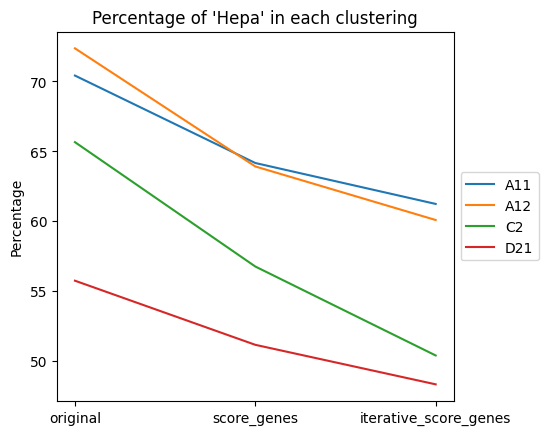

In [70]:
samples = ["A11","A12","C2","D21"]
fig, ax = plt.subplots()
for i in range(len(all_fractions_per_sample)):    
    ax.plot(names_anno_plot, all_fractions_per_sample[i],label = samples[i])
plt.ylabel("Percentage")
plt.title("Percentage of '" + chosen_ct + "' in each annotation")
plt.legend(cell_types)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  

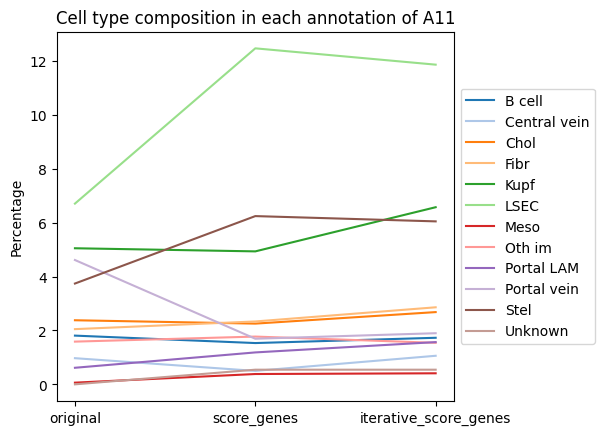

In [12]:
compare_annotations_composition(anndataA11,"A11",annotations,names_anno_plot,drop_cell_types=['Hepa'])

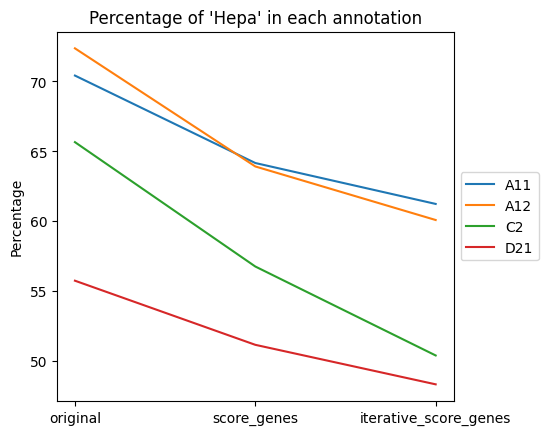

In [15]:
compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations,names_anno_plot,chosen_ct='Hepa')